In [1]:
import numpy as np
import matplotlib.pyplot as plt
plt.style.use("../science.mplstyle")

import os

import pickle
import xgboost as xgb

from helpers.make_BC import train_NN, np_to_torch
from helpers.physics_functions import *

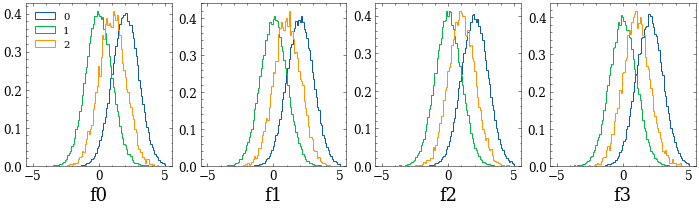

In [8]:
N_class0_train, N_class0_val = 100000, 50000
N_class1_train, N_class1_val = 50000, 25000

n_features = 4

sample0_train = np.random.normal(loc = 2, scale = 1, size = (N_class0_train, n_features))
sample1_train = np.random.normal(loc = 0, scale = 1, size = (N_class1_train, n_features))
sample2_train = np.random.normal(loc = 1, scale = 1, size = (10000, 4))

sample0_val = np.random.normal(loc = 2, scale = 1, size = (N_class0_val, n_features))
sample1_val = np.random.normal(loc = 0, scale = 1, size = (N_class1_val, n_features))

fig, ax = plt.subplots(1, n_features, figsize = (3*n_features, 3))
for i in range(n_features):
   
    ax[i].hist(sample0_train[:,i], bins = np.linspace(-5, 5, 100), density = True, histtype = "step", label = "0")
    ax[i].hist(sample1_train[:,i], bins = np.linspace(-5, 5, 100), density = True, histtype = "step", label = "1")
    ax[i].hist(sample2_train[:,i], bins = np.linspace(-5, 5, 100), density = True, histtype = "step", label = "2")
    ax[i].set_xlabel(f"f{i}")
ax[0].legend()
plt.show()
    


In [3]:

train_data = np.vstack([sample0_train, sample1_train])
train_labels =  np.vstack([np.zeros((sample0_train.shape[0], 1)), np.ones((sample1_train.shape[0], 1))])

val_data = np.vstack([sample0_val, sample1_val])
val_labels =  np.vstack([np.zeros((sample0_val.shape[0], 1)), np.ones((sample1_val.shape[0], 1))])






In [15]:

# best for feature set 3


param = {"max_depth": 10, 
         "learning_rate": 0.1,
         "subsample":1,
         "objective": "binary:logistic",
        }




def custom_logloss_for_optim(preds, dtrain):
    labels = dtrain.get_label()
    weights = dtrain.get_weight()
    
    preds = 1.0/(1 + np.exp(-preds))
    grad = preds - labels
    hess = preds * (1.0 - preds)
    return grad*weights, hess*weights


def custom_logloss_for_metric(preds, dtrain):
    labels = dtrain.get_label()
    weights = dtrain.get_weight()
    preds = 1.0/(1.0 + np.exp(-preds))
    
    logloss = -(labels*np.log(preds) + (1.0-labels)*(np.log(1.0-preds)))
    return "logloss_mine", np.mean(weights*logloss)
    
    

    
    

    
    
param_mine = {"max_depth": 10, 
         "learning_rate": 0.1,
         "subsample":1,
             'disable_default_eval_metric': True}


Training class weights:  {0: 1, 1: 2.0}
0.04133567 0.040689252
0.17691694 0.15720746
0.99753284 0.99698824
0.999355 0.9991242
0.10619389 0.19448034
0.970182 0.97390634
0.88532645 0.8757365
0.9981219 0.9987226
0.99960715 0.9997137
0.01705433 0.019251866
0.3480348 0.39140004
0.40158647 0.3102927
0.007071642 0.0065164985
0.14536227 0.09859652
0.0055731586 0.008042088
0.019299543 0.02042364
0.98878 0.99137515
0.870474 0.87024987
0.9325871 0.86575586
0.036473233 0.03714417


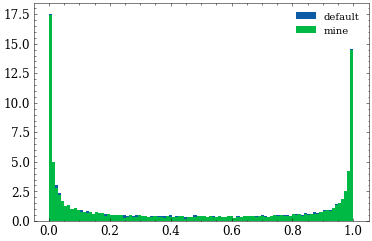

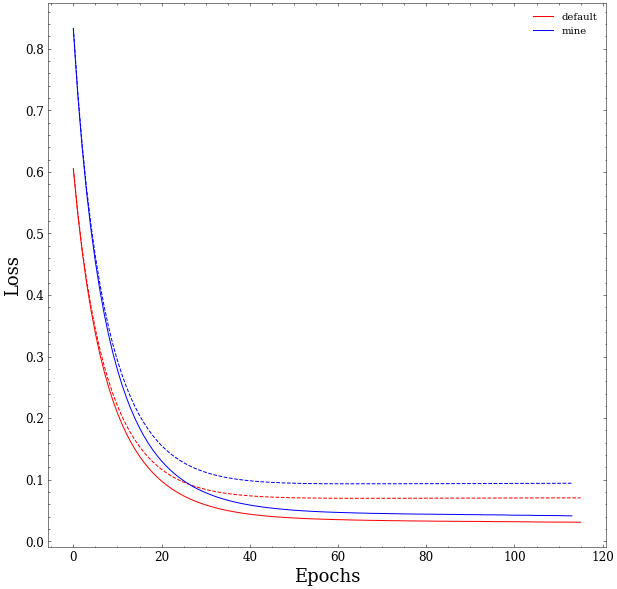

0.04133567 0.040689252
0.17691694 0.15720746
0.99753284 0.99698824
0.999355 0.9991242
0.10619389 0.19448034
0.970182 0.97390634
0.88532645 0.8757365
0.9981219 0.9987226
0.99960715 0.9997137
0.01705433 0.019251866
0.3480348 0.39140004
0.40158647 0.3102927
0.007071642 0.0065164985
0.14536227 0.09859652
0.0055731586 0.008042088
0.019299543 0.02042364
0.98878 0.99137515
0.870474 0.87024987
0.9325871 0.86575586
0.036473233 0.03714417


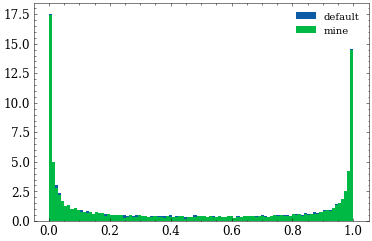

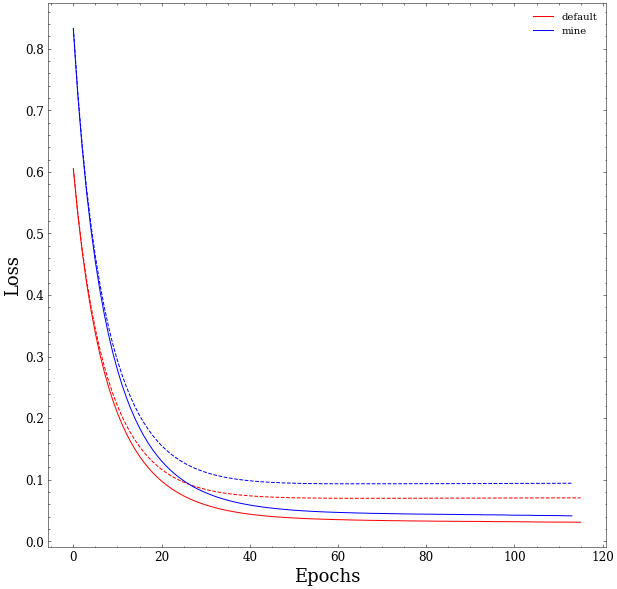

0.04133567 0.040689252
0.17691694 0.15720746
0.99753284 0.99698824
0.999355 0.9991242
0.10619389 0.19448034
0.970182 0.97390634
0.88532645 0.8757365
0.9981219 0.9987226
0.99960715 0.9997137
0.01705433 0.019251866
0.3480348 0.39140004
0.40158647 0.3102927
0.007071642 0.0065164985
0.14536227 0.09859652
0.0055731586 0.008042088
0.019299543 0.02042364
0.98878 0.99137515
0.870474 0.87024987
0.9325871 0.86575586
0.036473233 0.03714417


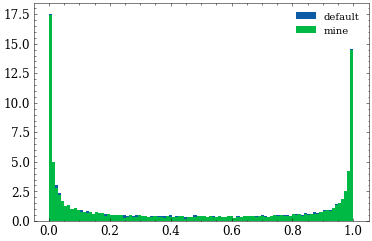

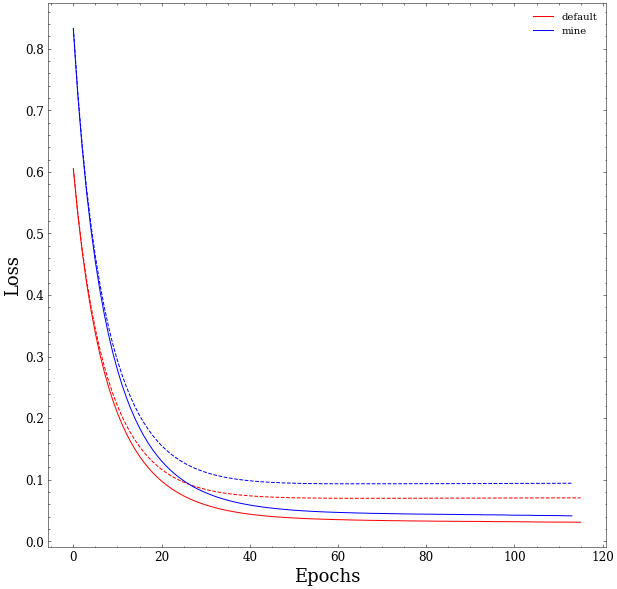

0.04133567 0.040689252
0.17691694 0.15720746
0.99753284 0.99698824
0.999355 0.9991242
0.10619389 0.19448034
0.970182 0.97390634
0.88532645 0.8757365
0.9981219 0.9987226
0.99960715 0.9997137
0.01705433 0.019251866
0.3480348 0.39140004
0.40158647 0.3102927
0.007071642 0.0065164985
0.14536227 0.09859652
0.0055731586 0.008042088
0.019299543 0.02042364
0.98878 0.99137515
0.870474 0.87024987
0.9325871 0.86575586
0.036473233 0.03714417


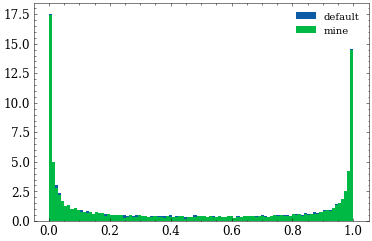

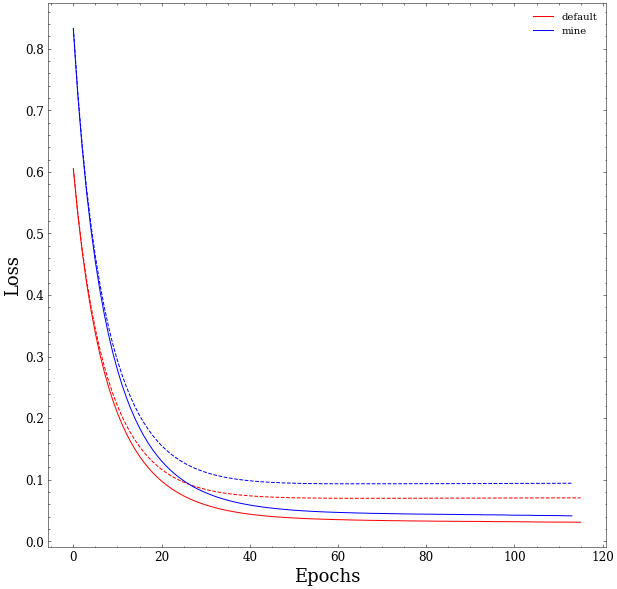

0.04133567 0.040689252
0.17691694 0.15720746
0.99753284 0.99698824
0.999355 0.9991242
0.10619389 0.19448034
0.970182 0.97390634
0.88532645 0.8757365
0.9981219 0.9987226
0.99960715 0.9997137
0.01705433 0.019251866
0.3480348 0.39140004
0.40158647 0.3102927
0.007071642 0.0065164985
0.14536227 0.09859652
0.0055731586 0.008042088
0.019299543 0.02042364
0.98878 0.99137515
0.870474 0.87024987
0.9325871 0.86575586
0.036473233 0.03714417


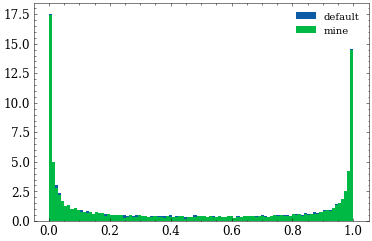

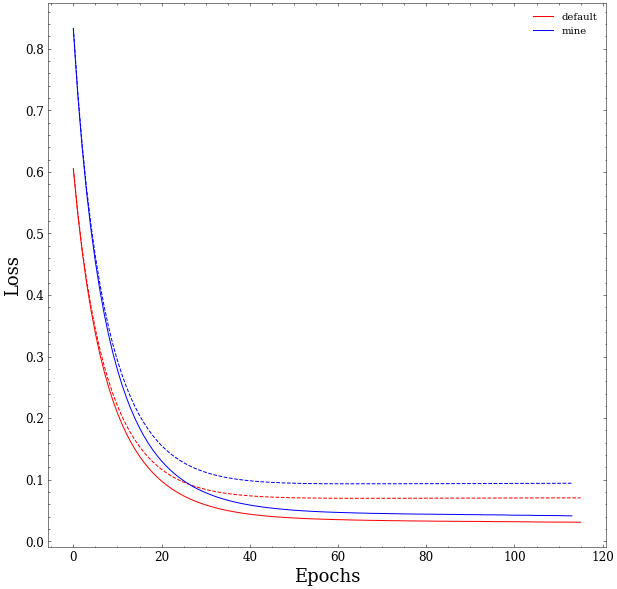

0.04133567 0.040689252
0.17691694 0.15720746
0.99753284 0.99698824
0.999355 0.9991242
0.10619389 0.19448034
0.970182 0.97390634
0.88532645 0.8757365
0.9981219 0.9987226
0.99960715 0.9997137
0.01705433 0.019251866
0.3480348 0.39140004
0.40158647 0.3102927
0.007071642 0.0065164985
0.14536227 0.09859652
0.0055731586 0.008042088
0.019299543 0.02042364
0.98878 0.99137515
0.870474 0.87024987
0.9325871 0.86575586
0.036473233 0.03714417


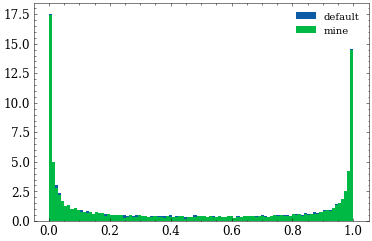

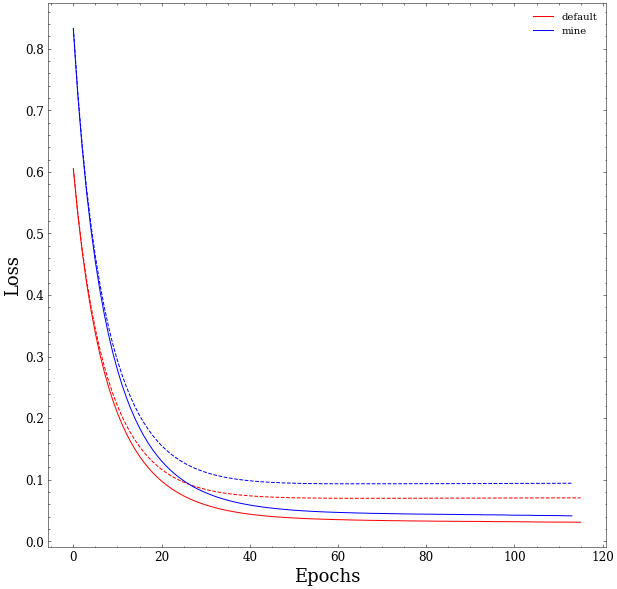

0.04133567 0.040689252
0.17691694 0.15720746
0.99753284 0.99698824
0.999355 0.9991242
0.10619389 0.19448034
0.970182 0.97390634
0.88532645 0.8757365
0.9981219 0.9987226
0.99960715 0.9997137
0.01705433 0.019251866
0.3480348 0.39140004
0.40158647 0.3102927
0.007071642 0.0065164985
0.14536227 0.09859652
0.0055731586 0.008042088
0.019299543 0.02042364
0.98878 0.99137515
0.870474 0.87024987
0.9325871 0.86575586
0.036473233 0.03714417


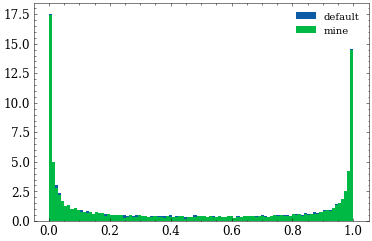

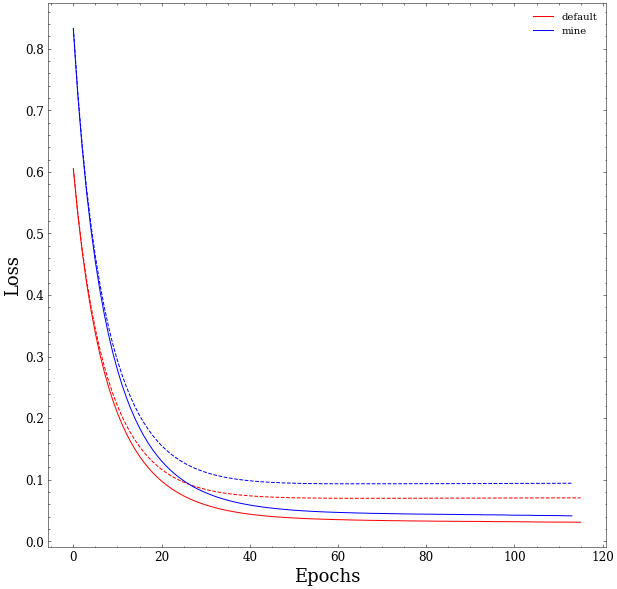

0.04133567 0.040689252
0.17691694 0.15720746
0.99753284 0.99698824
0.999355 0.9991242
0.10619389 0.19448034
0.970182 0.97390634
0.88532645 0.8757365
0.9981219 0.9987226
0.99960715 0.9997137
0.01705433 0.019251866
0.3480348 0.39140004
0.40158647 0.3102927
0.007071642 0.0065164985
0.14536227 0.09859652
0.0055731586 0.008042088
0.019299543 0.02042364
0.98878 0.99137515
0.870474 0.87024987
0.9325871 0.86575586
0.036473233 0.03714417


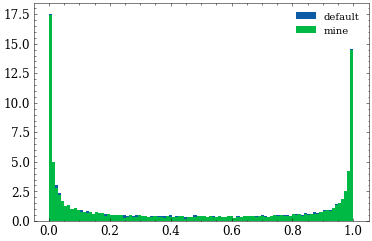

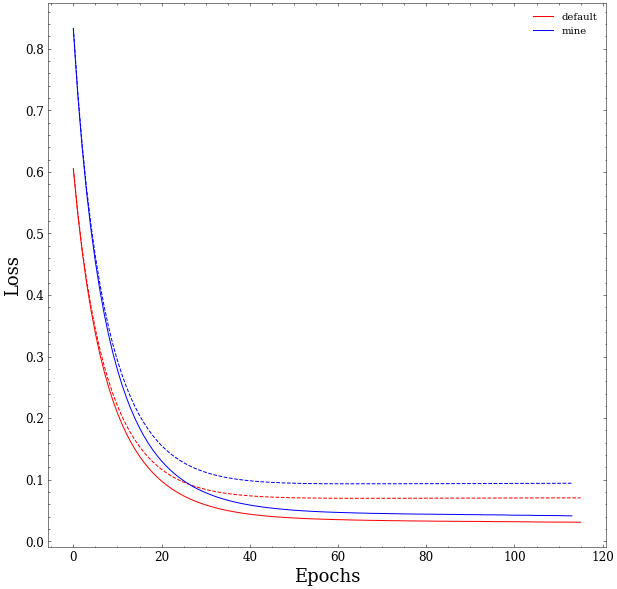

0.04133567 0.040689252
0.17691694 0.15720746
0.99753284 0.99698824
0.999355 0.9991242
0.10619389 0.19448034
0.970182 0.97390634
0.88532645 0.8757365
0.9981219 0.9987226
0.99960715 0.9997137
0.01705433 0.019251866
0.3480348 0.39140004
0.40158647 0.3102927
0.007071642 0.0065164985
0.14536227 0.09859652
0.0055731586 0.008042088
0.019299543 0.02042364
0.98878 0.99137515
0.870474 0.87024987
0.9325871 0.86575586
0.036473233 0.03714417


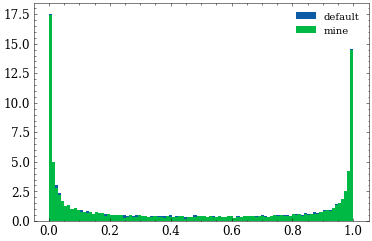

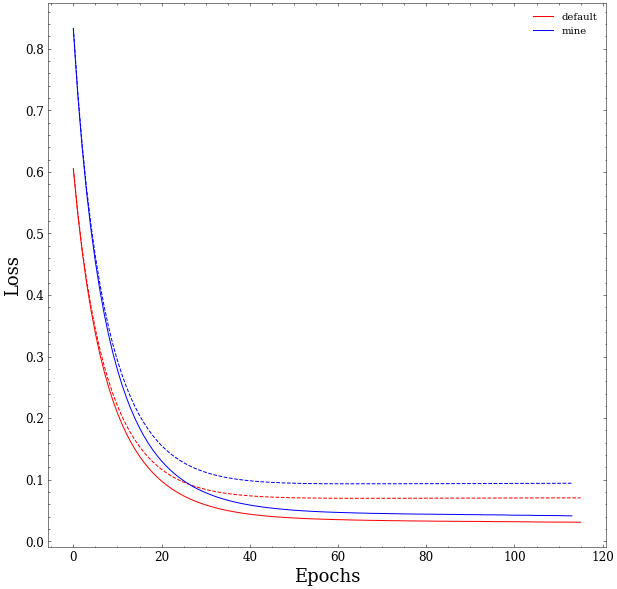

0.04133567 0.040689252
0.17691694 0.15720746
0.99753284 0.99698824
0.999355 0.9991242
0.10619389 0.19448034
0.970182 0.97390634
0.88532645 0.8757365
0.9981219 0.9987226
0.99960715 0.9997137
0.01705433 0.019251866
0.3480348 0.39140004
0.40158647 0.3102927
0.007071642 0.0065164985
0.14536227 0.09859652
0.0055731586 0.008042088
0.019299543 0.02042364
0.98878 0.99137515
0.870474 0.87024987
0.9325871 0.86575586
0.036473233 0.03714417


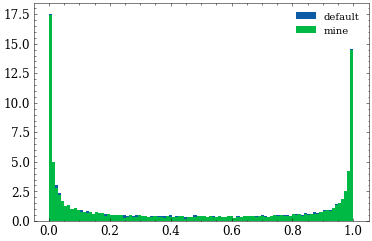

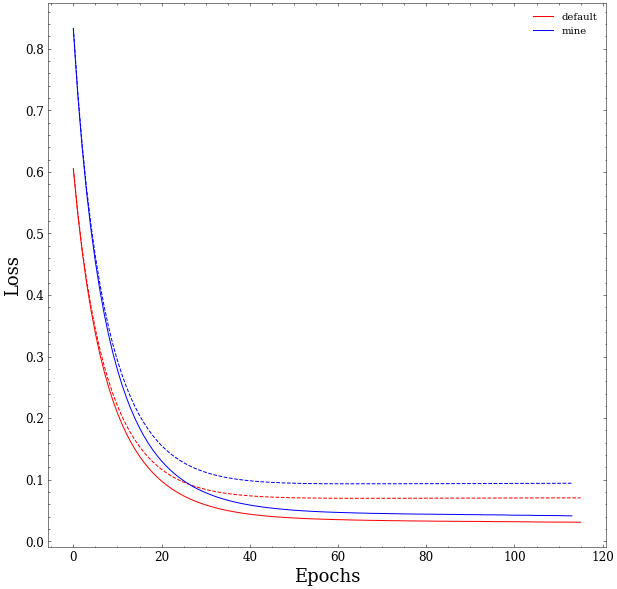

In [16]:

# adjust for class weights
class_weight = {0: 1, 1: sum(train_labels==0)[0]/sum(train_labels==1)[0]}
class_weights_train = class_weight[0]*(1.0-train_labels)+class_weight[1]*train_labels
class_weights_val = class_weight[0]*(1.0-val_labels)+class_weight[1]*val_labels


print("Training class weights: ", class_weight)
#Y_train_fold = Y_train_fold.reshape(-1,)
#class_weights = class_weights.reshape(-1,)

dtrain = xgb.DMatrix(train_data, train_labels, weight = class_weights_train)
dval = xgb.DMatrix(val_data, val_labels, weight = class_weights_val)
dtest = xgb.DMatrix(sample2_train, np.ones((sample2_train.shape[0],1)))


num_round = 200
early_stopping_rounds = 50

for i_tree in range(10):

    eval_set = [(dtrain, "train"), (dval, "val")]
    

    evals_result_default = {}
    bst_default = xgb.train(param, dtrain, num_boost_round=num_round, evals=eval_set, evals_result=evals_result_default, early_stopping_rounds=early_stopping_rounds,verbose_eval=False)
    scores_default = bst_default.predict(dtest)
    
    
    
    evals_result_mine = {}
    bst_mine = xgb.train(param_mine, dtrain, num_boost_round=num_round, evals=eval_set, evals_result=evals_result_mine, early_stopping_rounds=early_stopping_rounds, 
                    obj = custom_logloss_for_optim, custom_metric = custom_logloss_for_metric,verbose_eval=False)
    scores_mine = bst_mine.predict(dtest)
    scores_mine = 1.0/ (1.0+np.exp(-scores_mine))
    
    for i in range(20):
        print(scores_default[i], scores_mine[i])
    
    
    plt.figure()
    plt.hist(scores_default, bins = np.linspace(0, 1, 100), density = "True", label = "default")
    plt.hist(scores_mine, bins = np.linspace(0, 1, 100), density = "True", label = "mine")
    plt.legend()
    plt.show()

    plt.figure(figsize = (10, 10))
    plt.plot(evals_result_default["train"]["logloss"], label = f"default", color = "r")
    plt.plot(evals_result_default["val"]["logloss"], color = f"r", linestyle = "dashed")
    
    plt.plot(evals_result_mine["train"]["logloss_mine"], label = f"mine", color = f"b")
    plt.plot(evals_result_mine["val"]["logloss_mine"], color = f"b", linestyle = "dashed")
    plt.xlabel("Epochs")
    plt.ylabel("Loss")
    #plt.axvline(bst_i.best_iteration, color = f"C{i_tree}")

    plt.legend()
    plt.show()


